## Project on Text Data Analysis

### Perform sentiment analysis on youtube_comments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments=pd.read_csv(r'C:\Users\sameer narwade\Downloads\GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [4]:
!pip install textblob  --quiet

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polaritys=[]
for i in comments['comment_text']:
    polaritys.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity']=polaritys

In [11]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

# Perform EDA for the positive sentences

In [12]:
comments_positive=comments[comments['polarity']==1]

In [13]:
comments_positive

video_id                                       comment_text  likes  \
4       jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26      jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80      jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158     YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175     YPVcg45W0z4                        Welcome to the Scandiworld!      0   
...             ...                                                ...    ...   
718390  lLN1FwiqGwc  I'm just stopping the video three minutes in t...      0   
718416  lLN1FwiqGwc  Beating up tommy wiseu was the best part of th...      0   
718432  lLN1FwiqGwc                         kudos for the mtg cards :D      0   
718440  lLN1FwiqGwc                   Tommy Wiseau is my greatest fear      0   
718443  lLN1FwiqGwc                                           The best      0   

        replies  polarity  
4             0       1.0  
26            2       1.0  
80            1       1.0  
158           0       1.0  
175           0       1.0  
...         ...       ...  
718390        0       1.0  
718416        0       1.0  
718432        0       1.0  
718440        0       1.0  
718443        0       1.0  

[20400 rows x 5 columns]

In [14]:
!pip install wordcloud --quiet

In [15]:
from wordcloud import WordCloud,STOPWORDS

In [16]:
stopwords=set(STOPWORDS)

In [17]:
total_comments=' '.join(comments_positive['comment_text'])


In [18]:
WordCloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

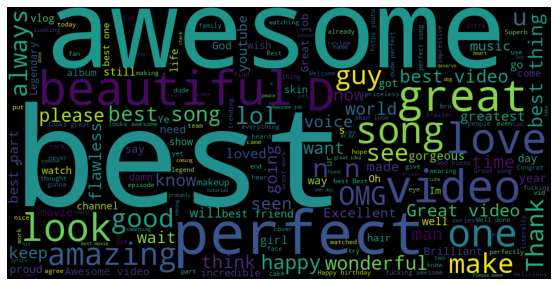

In [19]:
plt.figure(figsize=(15,5))
plt.imshow(WordCloud)
plt.axis('off')

#  Perform EDA for the negative sentences

In [20]:
comments_negative=comments[comments['polarity']==-1]

In [21]:
from wordcloud import WordCloud,STOPWORDS

In [22]:
stopwords=set(STOPWORDS)

In [23]:
total_comment=' '.join(comments_negative['comment_text'])

In [24]:
WordClouds=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

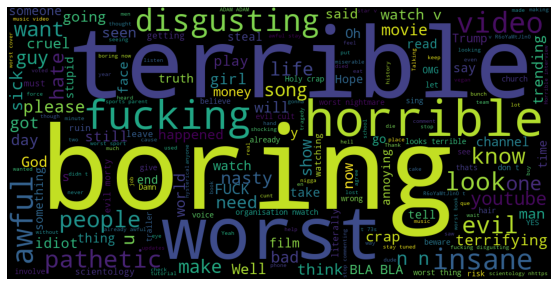

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(WordClouds)
plt.axis('off')

#  Analysing Tags Column, what are trending tags on youtube?

In [27]:
videos=pd.read_csv(r'C:\Users\sameer narwade\Downloads\USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [101]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [28]:
tags_complete=' '.join(videos['tags'])

In [29]:
import re

In [30]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [31]:
tags=re.sub(' +',' ',tags)

In [32]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

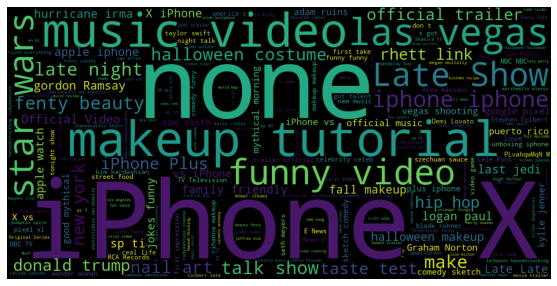

In [33]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Perform Analysis on likes,views and Dislikes and find hoe they are co-related with each other.

Text(0.5, 1.0, 'Regression plot for views and likes')

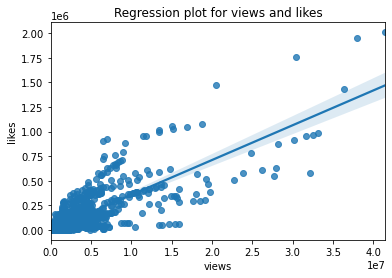

In [34]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

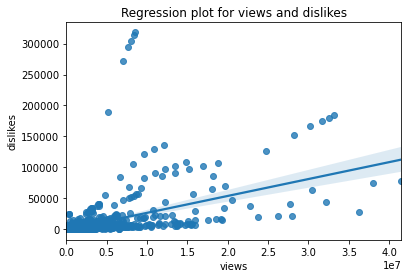

In [35]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes')

In [36]:
df_corr=videos[['views','likes','dislikes']]

In [37]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

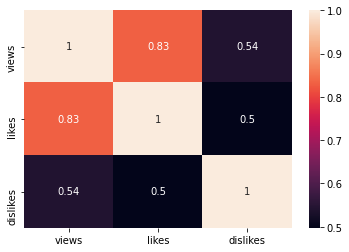

In [38]:
sns.heatmap(df_corr.corr(),annot=True)

#  Analyse Emoji's in comment

In [39]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [40]:
comment1=comments['comment_text'][1]

In [41]:
print('\U0001F600')

😀


In [42]:
!pip install emoji

In [43]:
import emoji
len(comments)

718424

In [45]:
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI['en']]
    for ele in list:
        str=str+ele

In [46]:
len(str)

333278

In [47]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [48]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [49]:
result

{'😦': 109,
 '♏': 14,
 '🐁': 31,
 '🍽': 8,
 '🍩': 76,
 '🧠': 1,
 '🔣': 5,
 '💄': 191,
 '🦏': 1,
 '◽': 5,
 '🎣': 27,
 '🃏': 10,
 '🌒': 18,
 '🗒': 5,
 '🍾': 143,
 '🍙': 11,
 '💱': 24,
 '🈲': 5,
 '💐': 118,
 '🍐': 12,
 '🍍': 67,
 '🐩': 43,
 '📂': 28,
 '🚰': 10,
 '🐬': 216,
 '🍸': 60,
 '👲': 16,
 '🍮': 18,
 '🚕': 17,
 '🚖': 21,
 '🍌': 78,
 '🛰': 7,
 '☕': 85,
 '🌄': 17,
 '👭': 75,
 '🌘': 14,
 '🈯': 5,
 '🧟': 4,
 '📽': 21,
 '🍰': 89,
 '🥙': 7,
 '🤒': 43,
 '☸': 4,
 '🧖': 5,
 '🍈': 15,
 '▶': 55,
 '🆑': 8,
 '👑': 853,
 '✳': 33,
 '😢': 2074,
 '🥉': 5,
 '☁': 71,
 '😚': 583,
 '⬆': 23,
 '🌆': 8,
 '🆖': 5,
 '☢': 20,
 '🍢': 14,
 '🦔': 2,
 '🍯': 105,
 '🐇': 41,
 '🕖': 534,
 '😪': 299,
 '💵': 118,
 '💧': 59,
 '🔈': 7,
 '🛄': 6,
 '🈺': 16,
 '🔄': 5,
 '🌯': 74,
 '🍑': 71,
 '🚥': 8,
 '⛅': 18,
 '🔭': 13,
 '🔋': 22,
 '🔽': 7,
 '🎟': 6,
 '😨': 390,
 '🛳': 10,
 '🤓': 187,
 '🛣': 4,
 '🍘': 10,
 '🎧': 183,
 '🏹': 8,
 '🥨': 1,
 '🌻': 222,
 '🐐': 209,
 '🐜': 55,
 '🛁': 6,
 '🎸': 118,
 '♊': 9,
 '🈸': 16,
 '🍥': 16,
 '🏚': 6,
 '⏯': 4,
 '📛': 14,
 '♀': 650,
 '🦎': 8,
 '🔆': 44,
 '⤵': 6,
 '🥚': 1,
 '☦'

In [50]:
final={}
for key,value in sorted(result.items(),key=lambda item:item[1]):
    final[key]=value


In [51]:
final

{'🧠': 1,
 '🦏': 1,
 '🥨': 1,
 '🥚': 1,
 '🛷': 1,
 '🧣': 1,
 '🤾': 1,
 '🛒': 1,
 '🧤': 1,
 '🤽': 1,
 '🤹': 1,
 '🦓': 1,
 '🤟': 1,
 '🥟': 1,
 '🤺': 1,
 '🥡': 1,
 '🥌': 1,
 '🥜': 1,
 '🦔': 2,
 '🤱': 2,
 '🦕': 2,
 '🧡': 2,
 '🧛': 2,
 '🥅': 2,
 '🦖': 2,
 '🧒': 2,
 '🧘': 2,
 '🧝': 2,
 '🎌': 2,
 '🧢': 2,
 '🧐': 3,
 '🥖': 3,
 '🤯': 3,
 '🥄': 3,
 '🤫': 3,
 '🤨': 3,
 '🧟': 4,
 '☸': 4,
 '🛣': 4,
 '⏯': 4,
 '☦': 4,
 '🖍': 4,
 '🏌': 4,
 '🗂': 4,
 '♟': 4,
 '⚙': 4,
 '🛬': 4,
 '⏹': 4,
 '🗓': 4,
 '🖇': 4,
 '🦐': 4,
 '♾': 4,
 '🥞': 4,
 '🏷': 4,
 '🗄': 4,
 '🥈': 4,
 '🛢': 4,
 '💹': 4,
 '⚧': 4,
 '⏲': 4,
 '🤬': 4,
 '🦍': 4,
 '🤵': 4,
 '⏏': 4,
 '⚗': 4,
 '🦆': 4,
 '🥝': 4,
 '⏸': 4,
 '🔣': 5,
 '◽': 5,
 '🗒': 5,
 '🈲': 5,
 '🈯': 5,
 '🧖': 5,
 '🥉': 5,
 '🆖': 5,
 '🔄': 5,
 '🔡': 5,
 '🛋': 5,
 'Ⓜ': 5,
 '🚛': 5,
 '🦒': 5,
 '🛥': 5,
 '☂': 5,
 '⚒': 5,
 '⛱': 5,
 '🔁': 5,
 '🔼': 5,
 '🗜': 5,
 '⛩': 5,
 '🥛': 5,
 '🚠': 5,
 '🔢': 5,
 '🗞': 5,
 '♠': 5,
 '⏺': 5,
 '🈴': 5,
 '✡': 5,
 '↕': 5,
 '🔳': 5,
 '⛸': 5,
 'ℹ': 5,
 '🎐': 5,
 '🈂': 5,
 '➿': 5,
 '🈹': 5,
 '🔤': 5,
 '🚻': 5,
 '♦': 5,
 '↪': 5,
 '🚁': 5,
 

In [52]:
keys=[*final.keys()]
keys

['🧠',
 '🦏',
 '🥨',
 '🥚',
 '🛷',
 '🧣',
 '🤾',
 '🛒',
 '🧤',
 '🤽',
 '🤹',
 '🦓',
 '🤟',
 '🥟',
 '🤺',
 '🥡',
 '🥌',
 '🥜',
 '🦔',
 '🤱',
 '🦕',
 '🧡',
 '🧛',
 '🥅',
 '🦖',
 '🧒',
 '🧘',
 '🧝',
 '🎌',
 '🧢',
 '🧐',
 '🥖',
 '🤯',
 '🥄',
 '🤫',
 '🤨',
 '🧟',
 '☸',
 '🛣',
 '⏯',
 '☦',
 '🖍',
 '🏌',
 '🗂',
 '♟',
 '⚙',
 '🛬',
 '⏹',
 '🗓',
 '🖇',
 '🦐',
 '♾',
 '🥞',
 '🏷',
 '🗄',
 '🥈',
 '🛢',
 '💹',
 '⚧',
 '⏲',
 '🤬',
 '🦍',
 '🤵',
 '⏏',
 '⚗',
 '🦆',
 '🥝',
 '⏸',
 '🔣',
 '◽',
 '🗒',
 '🈲',
 '🈯',
 '🧖',
 '🥉',
 '🆖',
 '🔄',
 '🔡',
 '🛋',
 'Ⓜ',
 '🚛',
 '🦒',
 '🛥',
 '☂',
 '⚒',
 '⛱',
 '🔁',
 '🔼',
 '🗜',
 '⛩',
 '🥛',
 '🚠',
 '🔢',
 '🗞',
 '♠',
 '⏺',
 '🈴',
 '✡',
 '↕',
 '🔳',
 '⛸',
 'ℹ',
 '🎐',
 '🈂',
 '➿',
 '🈹',
 '🔤',
 '🚻',
 '♦',
 '↪',
 '🚁',
 '⛏',
 '🔠',
 '🈁',
 '↖',
 '🕹',
 '🖲',
 '❎',
 '🗃',
 '🖨',
 '🌫',
 '⚾',
 '🔂',
 '🤮',
 '🗳',
 '🚎',
 '🔃',
 '🔚',
 '㊙',
 '🚟',
 '⛴',
 '🕎',
 '🆔',
 '🖊',
 '◻',
 '🏮',
 '⌨',
 '🈳',
 '🈵',
 '🛂',
 '🚉',
 '🔲',
 '↔',
 '🔖',
 '🛤',
 '🖼',
 '🧜',
 '↩',
 '🆎',
 '🛄',
 '🎟',
 '🛁',
 '🏚',
 '⤵',
 '⏫',
 '🦌',
 '⤴',
 '🚇',
 '🚺',
 '🖌',
 '🌥',
 '🚃',
 '🚾',
 '🚯',
 '🔀',
 '🆕',
 '🦇'

In [53]:
values=[*final.values()]
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [54]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [55]:
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [56]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [57]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])

# Thank You!